In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
warn.filterwarnings('ignore')

In [ ]:
ticker = "BTC-USD"
btc_cc = yf.download(ticker, start="2014-09-17", end="2025-05-30", auto_adjust=False)
btc_cc.reset_index(inplace=True)
btc_cc

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...,...
3903,2025-05-25,109035.390625,109035.390625,109313.304688,106683.375000,107802.273438,47518041841
3904,2025-05-26,109440.367188,109440.367188,110376.882812,108735.640625,109023.781250,45950461571
3905,2025-05-27,108994.640625,108994.640625,110744.210938,107609.554688,109440.406250,57450176272


In [ ]:
btc_cc.columns = ['_'.join(filter(None, col)).strip() for col in btc_cc.columns]
btc_cc.columns = [col.replace(f'_{ticker}', '') for col in btc_cc.columns]
btc_cc

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...,...
3903,2025-05-25,109035.390625,109035.390625,109313.304688,106683.375000,107802.273438,47518041841
3904,2025-05-26,109440.367188,109440.367188,110376.882812,108735.640625,109023.781250,45950461571
3905,2025-05-27,108994.640625,108994.640625,110744.210938,107609.554688,109440.406250,57450176272
3906,2025-05-28,107802.328125,107802.328125,109298.289062,106812.929688,108992.171875,49155377493


In [ ]:
btc_cc.to_csv('btc_usd.csv', index=False)

In [ ]:
btc_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3908 non-null   datetime64[ns]
 1   Adj Close  3908 non-null   float64       
 2   Close      3908 non-null   float64       
 3   High       3908 non-null   float64       
 4   Low        3908 non-null   float64       
 5   Open       3908 non-null   float64       
 6   Volume     3908 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 213.8 KB


Viewing the Start and End Dates in this imported BTC historical crypto trading data

In [ ]:
first_date = btc_cc['Date'].min()
last_date = btc_cc['Date'].max()

print("First trading date in the BTC historical data:", first_date.date())
print("Last trading date in the BTC historical data:", last_date.date())

First trading date in the BTC historical data: 2014-09-17
Last trading date in the BTC historical data: 2025-05-29


In [ ]:
print("Minimum BTC Closing Price:", btc_cc['Close'].min())
print("Maximum BTC Closing Price:", btc_cc['Close'].max())
print("Minimum BTC Opening Price:", btc_cc['Open'].min())
print("Maximum BTC Opening Price:", btc_cc['Open'].max())
print("Lowest recorded BTC high price:", btc_cc['High'].min())
print("Highest recorded BTC high price:", btc_cc['High'].max())
print("Lowest recorded BTC low price:", btc_cc['Low'].min())
print("Highest recorded BTC low price:", btc_cc['Low'].max())
print("Lowest recorded BTC trading volume:", btc_cc['Volume'].min())
print("Highest recorded BTC trading volume:", btc_cc['Volume'].max())

Minimum BTC Closing Price: 178.10299682617188
Maximum BTC Closing Price: 111673.28125
Minimum BTC Opening Price: 176.89700317382812
Maximum BTC Opening Price: 111679.359375
Lowest recorded BTC high price: 211.7310028076172
Highest recorded BTC high price: 111970.171875
Lowest recorded BTC low price: 171.50999450683594
Highest recorded BTC low price: 109285.0703125
Lowest recorded BTC trading volume: 5914570
Highest recorded BTC trading volume: 350967941479


# Data Analysis - Visualisation

**Bitcoin End-of-Month Closing Price Trend**

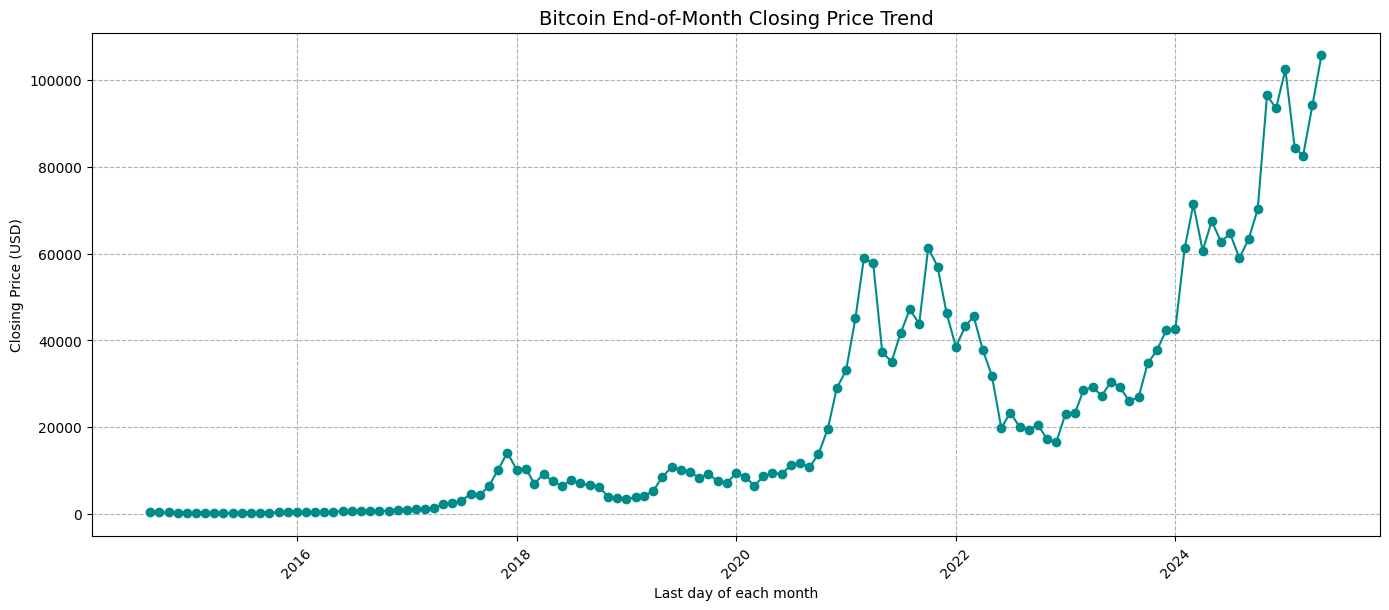

In [ ]:
plt.figure(figsize=(14, 6))

trend_monthly = btc_cc.groupby([btc_cc['Date'].dt.year, btc_cc['Date'].dt.month]).last()
trend_monthly.index.names = ['Year', 'Month']
trend_monthly = trend_monthly.reset_index()
trend_monthly['Date'] = pd.to_datetime(trend_monthly[['Year', 'Month']].assign(day=1))

plt.plot(trend_monthly['Date'], trend_monthly['Close'], color='darkcyan', marker='o')
plt.title('Bitcoin End-of-Month Closing Price Trend', fontsize=14)
plt.xlabel('Last day of each month')
plt.ylabel('Closing Price (USD)')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Candle Stick Chart showing the monthly bitcoin price and the fluctuations**

In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Grouping the data by year & month, and getting the last entry of each month
month_end = btc_cc.groupby([btc_cc['Date'].dt.to_period('M')]).agg({
    'Date': 'last', 'Open': 'first', 'High': 'max', 'Low': 'min',
    'Close': 'last'}).reset_index(drop=True)

fig_Candlestick = go.Figure(data=[go.Candlestick(x=month_end['Date'],
                                     open=month_end['Open'],
                                     high=month_end['High'],
                                     low=month_end['Low'],
                                     close=month_end['Close'],
                                     increasing_line_color='green',
                                     decreasing_line_color='red')])

fig_Candlestick.update_layout(title='Candlestick Chart - Monthly Bitcoin Price',
                  xaxis_title='Last day of each month',
                  yaxis_title='BTC Price (USD)',
                  xaxis_rangeslider_visible=False,
                  template='plotly_white',
                  height=600, width=1000)
fig_Candlestick.show()

Candle stick chart for the months April and May 2025

In [ ]:
april_may_data = btc_cc[(btc_cc['Date'] >= '2025-04-01') & (btc_cc['Date'] <= '2025-05-30')]

# Plot the daily candlestick chart
fig_Candlestick = go.Figure(data=[go.Candlestick(
    x=april_may_data['Date'],
    open=april_may_data['Open'],
    high=april_may_data['High'],
    low=april_may_data['Low'],
    close=april_may_data['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

fig_Candlestick.update_layout(
    title='Daily Bitcoin Candlestick Chart - April & May 2025',
    xaxis_title='Date',
    yaxis_title='BTC Price (USD)',
    xaxis_rangeslider_visible=False,
    template='plotly_white',
    height=600,
    width=1000
)

fig_Candlestick.show()

In [ ]:
btc_cc.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


Taking only the Date and Price columns for univariate time series analysis focused on BTC's closing price trend.

In [ ]:
btc_cc = btc_cc[['Date', 'Close']]
btc_cc

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3903,2025-05-25,109035.390625
3904,2025-05-26,109440.367188
3905,2025-05-27,108994.640625
3906,2025-05-28,107802.328125


Sliding window one-step ahead forecasting

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [ ]:
close_prices = btc_cc['Close'].values
print("\nClose prices (first 15):", close_prices[:15])
print("Total number of close prices:", len(close_prices))


Close prices (first 15): [457.33401489 424.44000244 394.79598999 408.9039917  398.8210144
 402.15200806 435.79098511 423.20498657 411.57400513 404.42498779
 399.51998901 377.18099976 375.4670105  386.94400024 383.61499023]
Total number of close prices: 3908


In [ ]:
window_size = 10  # input sequence length
forecast_horizon = 1  # predict the next day only

#Create input-output pairs with sliding window
X, y = [], []
for i in range(window_size, len(close_prices)):
    X.append(close_prices[i - window_size:i])    # days t-9 to t (10 days)
    y.append(close_prices[i])                   # day t+1 (next day)

X = np.array(X)
y = np.array(y)

print("\nShape of X:", X.shape)  # Should be (num_samples, window_size)
print("Shape of y:", y.shape)    # Should be (num_samples,)
print("\nFirst X sample:", X[0].flatten())
print("Corresponding y value:", y[0])


Shape of X: (3898, 10)
Shape of y: (3898,)

First X sample: [457.33401489 424.44000244 394.79598999 408.9039917  398.8210144
 402.15200806 435.79098511 423.20498657 411.57400513 404.42498779]
Corresponding y value: 399.5199890136719


In [ ]:
# Reshaping X for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

print("\nReshaped X for LSTM:", X.shape)  # (samples, timesteps, 1)


Reshaped X for LSTM: (3898, 10, 1)


Splitting the data into train and test sets (e.g., 80% train, 20% test)

In [ ]:
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print("\nTrain set size: X_train =", X_train.shape, ", y_train =", y_train.shape)
print("Test set size: X_test =", X_test.shape, ", y_test =", y_test.shape)


Train set size: X_train = (3118, 10, 1) , y_train = (3118,)
Test set size: X_test = (780, 10, 1) , y_test = (780,)


# **Unidirectional LSTM**

In [ ]:
#Building the Uni-LSTM model
Uni_LSTM = Sequential()
Uni_LSTM.add(LSTM(300, activation='selu', input_shape=(window_size, 1)))
Uni_LSTM.add(Dense(1))  # single output for next day's price
Uni_LSTM.compile(optimizer='adam', loss='mse', metrics=['mae'])

Uni_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 300)            │       362,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,701 (1.38 MB)

 Trainable params: 362,701 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the Uni-LSTM model
history = Uni_LSTM.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 29040220.0000 - mae: 2275.7039 - val_loss: 8433814.0000 - val_mae: 2203.9570
Epoch 2/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2438605.0000 - mae: 694.1555 - val_loss: 6952345.5000 - val_mae: 1925.4032
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1924856.8750 - mae: 598.8226 - val_loss: 4760541.0000 - val_mae: 1555.8479
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1583384.7500 - mae: 545.4265 - val_loss: 6612263.5000 - val_mae: 1822.4325
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1977982.2500 - mae: 595.2695 - val_loss: 5911375.0000 - val_mae: 1729.3049
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1691004.6250 - mae: 551.9238 - val_loss: 6287189.0000 - val_mae: 1786.7518
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1795233.1250 - mae: 574.1094 - val_loss: 7023741.5000 - val_mae: 1953.5031
Epoch 8/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1

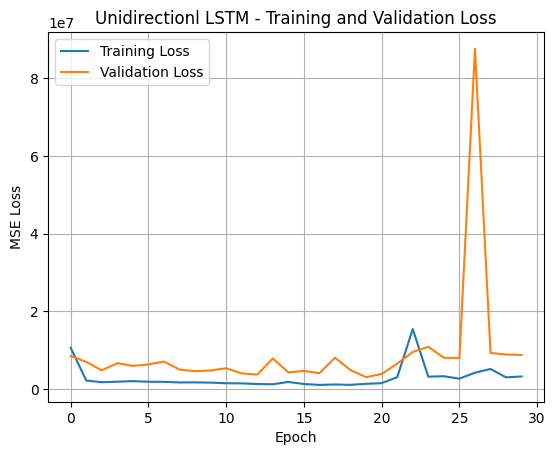

In [ ]:
#Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Unidirectionl LSTM - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Predicting on the test data
y_pred = Uni_LSTM.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE - Uni-LSTM: {mae:.4f}")
print(f"MSE - Uni-LSTM: {mse:.4f}")
print(f"R² Score- Uni-LSTM: {r2:.4f}")
print(f"RMSE - Uni-LSTM: {rmse:.4f}")
print(f"MAPE - Uni-LSTM: {mape:.2f}%")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE - Uni-LSTM: 2652.2828
MSE - Uni-LSTM: 14105445.9861
R² Score- Uni-LSTM: 0.9783
RMSE - Uni-LSTM: 3755.7218
MAPE - Uni-LSTM: 4.35%


In [ ]:
# Printing row-by-row prediction for better understanding
print("\n--- Row-by-Row Predictions ---")
for i in range(5):
    print(f"\nSample {i+1}:")
    print("Input (last 10 days):", X_test[i].flatten())
    print("Uni-LSTM Model Prediction (next day):", y_pred[i])
    print("Actual Next Day Value      :", y_test[i])


--- Row-by-Row Predictions ---

Sample 1:
Input (last 10 days): [28411.03515625 28199.30859375 27790.22070312 28168.08984375
 28177.984375   28044.140625   27925.859375   27947.79492188
 28333.05078125 29652.98046875]
Uni-LSTM Model Prediction (next day): 28126.215
Actual Next Day Value      : 30235.05859375

Sample 2:
Input (last 10 days): [28199.30859375 27790.22070312 28168.08984375 28177.984375
 28044.140625   27925.859375   27947.79492188 28333.05078125
 29652.98046875 30235.05859375]
Uni-LSTM Model Prediction (next day): 28134.066
Actual Next Day Value      : 30139.052734375

Sample 3:
Input (last 10 days): [27790.22070312 28168.08984375 28177.984375   28044.140625
 27925.859375   27947.79492188 28333.05078125 29652.98046875
 30235.05859375 30139.05273438]
Uni-LSTM Model Prediction (next day): 28202.758
Actual Next Day Value      : 30399.06640625

Sample 4:
Input (last 10 days): [28168.08984375 28177.984375   28044.140625   27925.859375
 27947.79492188 28333.05078125 29652.98046

In [ ]:
#Print some predictions vs actuals
print("\nPredictions vs actual closing prices:")
for i in range(10):
    print(f"Predicted: {y_pred[i]:.2f}  |  Actual: {y_test[i]:.2f}")


Predictions vs actual closing prices:
Predicted: 28126.21  |  Actual: 30235.06
Predicted: 28134.07  |  Actual: 30139.05
Predicted: 28202.76  |  Actual: 30399.07
Predicted: 28350.54  |  Actual: 30485.70
Predicted: 28479.36  |  Actual: 30318.50
Predicted: 28665.67  |  Actual: 30315.36
Predicted: 29002.45  |  Actual: 29445.04
Predicted: 29423.06  |  Actual: 30397.55
Predicted: 29844.15  |  Actual: 28822.68
Predicted: 30121.94  |  Actual: 28245.99


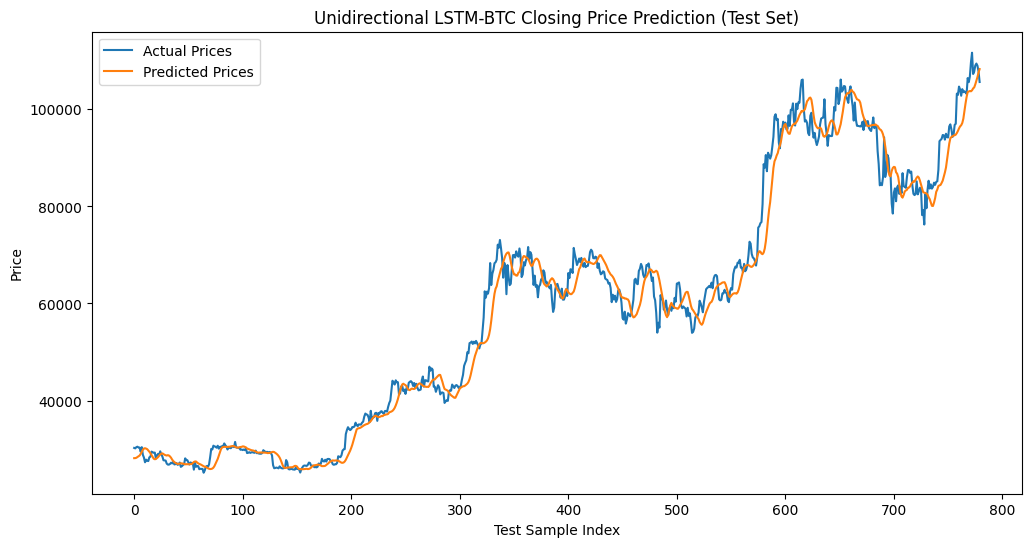

In [ ]:
# Plotting actual vs predicted prices on test set
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Unidirectional LSTM-BTC Closing Price Prediction (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Bidirectional LSTM

In [ ]:
#Building the Bi-LSTM model
Bi_LSTM = Sequential()
Bi_LSTM.add(Bidirectional(LSTM(300, activation='selu', input_shape=(window_size, 1))))
Bi_LSTM.add(Dense(1))  # single output for next day's price
Bi_LSTM.compile(optimizer='adam', loss='mse', metrics=['mae'])

Bi_LSTM.build(input_shape=(None, window_size, 1))
Bi_LSTM.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 600)            │       724,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,401 (2.77 MB)

 Trainable params: 725,401 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the Bi-LSTM model
history = Bi_LSTM.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 28454056.0000 - mae: 1873.9507 - val_loss: 3947664.7500 - val_mae: 1452.9506
Epoch 2/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 1141570.0000 - mae: 450.0335 - val_loss: 3586585.0000 - val_mae: 1310.4270
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 985707.6250 - mae: 438.3122 - val_loss: 6082355.5000 - val_mae: 1885.1438
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1002914.3750 - mae: 437.2380 - val_loss: 3377878.5000 - val_mae: 1295.3859
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 1043205.5000 - mae: 425.2622 - val_loss: 3970242.5000 - val_mae: 1401.2629
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 1375429.2500 - mae: 499.1744 - val_loss: 3875253.2500 - val_mae: 1421.8259
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1056153.2500 - mae: 445.3237 - val_loss: 2841626.7500 - val_mae: 1177.6346
Epoch 8/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 99

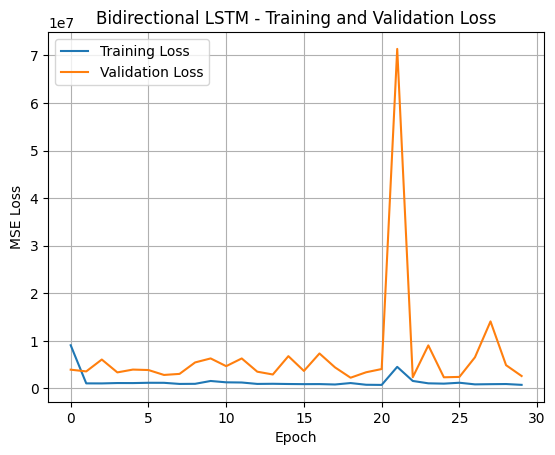

In [ ]:
#Plotting training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Predicting on the test data
y_pred = Bi_LSTM.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE - Bi-LSTM: {mae:.4f}")
print(f"MSE - Bi-LSTM: {mse:.4f}")
print(f"R² Score- Bi-LSTM: {r2:.4f}")
print(f"RMSE - Bi-LSTM: {rmse:.4f}")
print(f"MAPE - Bi-LSTM: {mape:.2f}%")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
MAE - Bi-LSTM: 1808.3168
MSE - Bi-LSTM: 5997401.3485
R² Score- Bi-LSTM: 0.9908
RMSE - Bi-LSTM: 2448.9592
MAPE - Bi-LSTM: 2.97%


In [ ]:
# Printing row-by-row prediction for better understanding
print("\n--- Row-by-Row Predictions ---")
for i in range(5):
    print(f"\nSample {i+1}:")
    print("Input (last 10 days):", X_test[i].flatten())
    print("Bi-LSTM Model Prediction (next day):", y_pred[i])
    print("Actual Next Day Value      :", y_test[i])


--- Row-by-Row Predictions ---

Sample 1:
Input (last 10 days): [28411.03515625 28199.30859375 27790.22070312 28168.08984375
 28177.984375   28044.140625   27925.859375   27947.79492188
 28333.05078125 29652.98046875]
Bi-LSTM Model Prediction (next day): 28361.873
Actual Next Day Value      : 30235.05859375

Sample 2:
Input (last 10 days): [28199.30859375 27790.22070312 28168.08984375 28177.984375
 28044.140625   27925.859375   27947.79492188 28333.05078125
 29652.98046875 30235.05859375]
Bi-LSTM Model Prediction (next day): 28996.65
Actual Next Day Value      : 30139.052734375

Sample 3:
Input (last 10 days): [27790.22070312 28168.08984375 28177.984375   28044.140625
 27925.859375   27947.79492188 28333.05078125 29652.98046875
 30235.05859375 30139.05273438]
Bi-LSTM Model Prediction (next day): 29419.973
Actual Next Day Value      : 30399.06640625

Sample 4:
Input (last 10 days): [28168.08984375 28177.984375   28044.140625   27925.859375
 27947.79492188 28333.05078125 29652.98046875 

In [ ]:
#Print some predictions vs actuals
print("\nPredictions vs actual closing prices:")
for i in range(10):
    print(f"Predicted: {y_pred[i]:.2f}  |  Actual: {y_test[i]:.2f}")


Predictions vs actual closing prices:
Predicted: 28361.87  |  Actual: 30235.06
Predicted: 28996.65  |  Actual: 30139.05
Predicted: 29419.97  |  Actual: 30399.07
Predicted: 29787.93  |  Actual: 30485.70
Predicted: 29640.89  |  Actual: 30318.50
Predicted: 29703.80  |  Actual: 30315.36
Predicted: 29687.65  |  Actual: 29445.04
Predicted: 29329.20  |  Actual: 30397.55
Predicted: 29400.31  |  Actual: 28822.68
Predicted: 28896.59  |  Actual: 28245.99


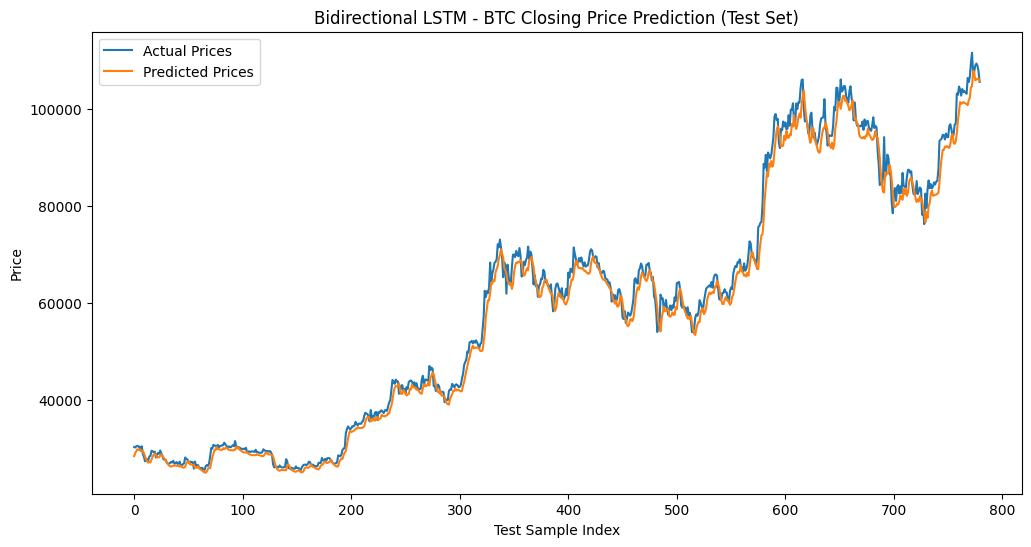

In [ ]:
# Plotting actual vs predicted prices on test set
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Bidirectional LSTM - BTC Closing Price Prediction (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Stacked LSTM

In [ ]:
stacked_LSTM = Sequential()
stacked_LSTM.add(LSTM(300, activation='selu', return_sequences=True, input_shape=(window_size, 1)))
stacked_LSTM.add(LSTM(150, activation='selu'))
stacked_LSTM.add(Dense(1))
stacked_LSTM.compile(optimizer='adam', loss='mse', metrics=['mae'])

stacked_LSTM.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10, 300)        │       362,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 150)            │       270,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 633,151 (2.42 MB)

 Trainable params: 633,151 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = stacked_LSTM.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 83117824.0000 - mae: 3562.8201 - val_loss: 9057474.0000 - val_mae: 2217.9827
Epoch 2/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 3441022.0000 - mae: 763.2329 - val_loss: 9047573.0000 - val_mae: 2299.3975
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 2163574.0000 - mae: 654.2997 - val_loss: 10197858.0000 - val_mae: 2328.3406
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 2489189.2500 - mae: 658.3564 - val_loss: 7885564.0000 - val_mae: 1977.2250
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 2965298.2500 - mae: 735.6717 - val_loss: 8407826.0000 - val_mae: 2087.9575
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 2091144.5000 - mae: 653.8068 - val_loss: 8371095.0000 - val_mae: 2057.9321
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 2740515.2500 - mae: 685.5375 - val_loss: 7934679.0000 - val_mae: 2023.6130
Epoch 8/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 

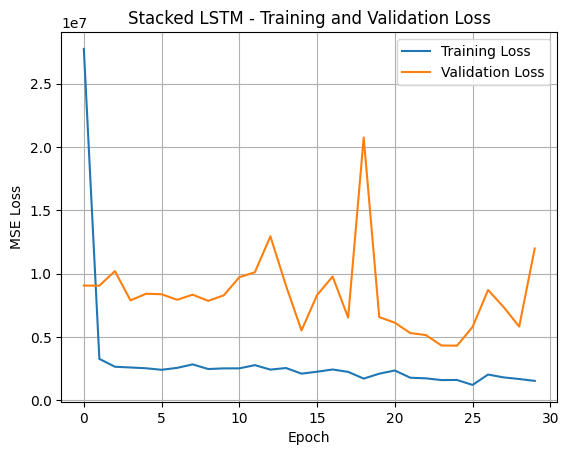

In [ ]:
#Plotting training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Stacked LSTM - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Predicting on the test data
y_pred = stacked_LSTM.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE - Stacked-LSTM: {mae:.4f}")
print(f"MSE - Stacked-LSTM: {mse:.4f}")
print(f"R² Score- Stacked-LSTM: {r2:.4f}")
print(f"RMSE - Stacked-LSTM: {rmse:.4f}")
print(f"MAPE - Stacked-LSTM: {mape:.2f}%")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE - Stacked-LSTM: 5236.5171
MSE - Stacked-LSTM: 38105585.2161
R² Score- Stacked-LSTM: 0.9413
RMSE - Stacked-LSTM: 6172.9722
MAPE - Stacked-LSTM: 8.68%


In [ ]:
# Printing row-by-row prediction for better understanding
print("\n--- Row-by-Row Predictions ---")
for i in range(5):
    print(f"\nSample {i+1}:")
    print("Input (last 10 days):", X_test[i].flatten())
    print("Stacked LSTM Model Prediction (next day):", y_pred[i])
    print("Actual Next Day Value      :", y_test[i])


--- Row-by-Row Predictions ---

Sample 1:
Input (last 10 days): [28411.03515625 28199.30859375 27790.22070312 28168.08984375
 28177.984375   28044.140625   27925.859375   27947.79492188
 28333.05078125 29652.98046875]
Stacked LSTM Model Prediction (next day): 25933.275
Actual Next Day Value      : 30235.05859375

Sample 2:
Input (last 10 days): [28199.30859375 27790.22070312 28168.08984375 28177.984375
 28044.140625   27925.859375   27947.79492188 28333.05078125
 29652.98046875 30235.05859375]
Stacked LSTM Model Prediction (next day): 26291.969
Actual Next Day Value      : 30139.052734375

Sample 3:
Input (last 10 days): [27790.22070312 28168.08984375 28177.984375   28044.140625
 27925.859375   27947.79492188 28333.05078125 29652.98046875
 30235.05859375 30139.05273438]
Stacked LSTM Model Prediction (next day): 26768.535
Actual Next Day Value      : 30399.06640625

Sample 4:
Input (last 10 days): [28168.08984375 28177.984375   28044.140625   27925.859375
 27947.79492188 28333.05078125

In [ ]:
#Print some predictions vs actuals
print("\nPredictions vs actual closing prices:")
for i in range(10):
    print(f"Predicted: {y_pred[i]:.2f}  |  Actual: {y_test[i]:.2f}")


Predictions vs actual closing prices:
Predicted: 25933.28  |  Actual: 30235.06
Predicted: 26291.97  |  Actual: 30139.05
Predicted: 26768.54  |  Actual: 30399.07
Predicted: 27275.81  |  Actual: 30485.70
Predicted: 27668.28  |  Actual: 30318.50
Predicted: 27764.96  |  Actual: 30315.36
Predicted: 27849.18  |  Actual: 29445.04
Predicted: 27853.17  |  Actual: 30397.55
Predicted: 27804.44  |  Actual: 28822.68
Predicted: 27568.23  |  Actual: 28245.99


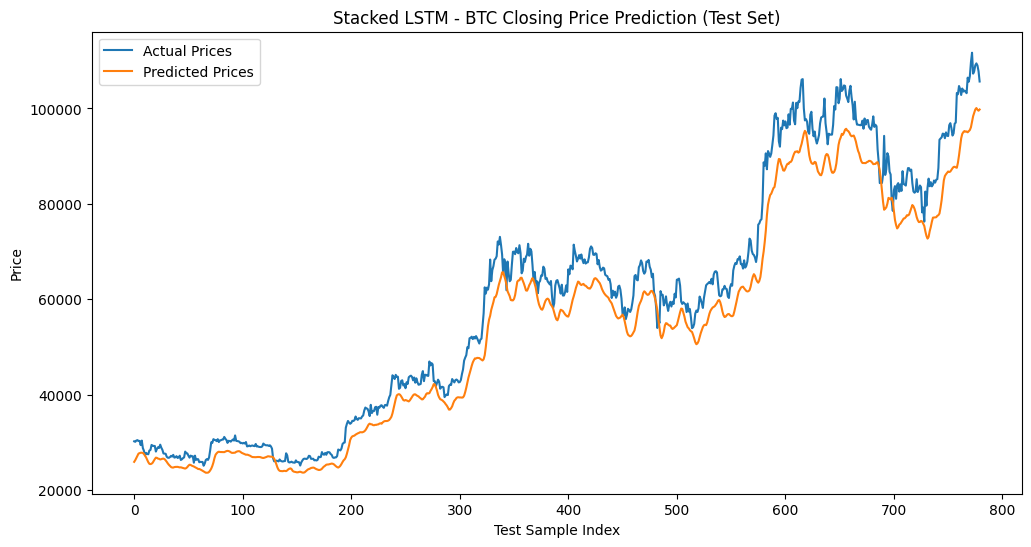

In [ ]:
# Plotting actual vs predicted prices on test set
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Stacked LSTM - BTC Closing Price Prediction (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()